In [8]:
import pandas as pd

acc_x_balance = pd.read_csv('avk_hackathon_data_account_x_balance.csv')
acc_x_balance.head(10)

,party_rk,account_rk,prev_month,cur_month,balance_chng
0,51607,55309,2018-12-31,2019-01-31,15000.0
1,59074,70471,2018-12-31,2019-01-31,0.0
2,33941,33065,2018-12-31,2019-01-31,-15000.0
3,9336,8611,2018-12-31,2019-01-31,-50000.0
4,13958,8421,2018-12-31,2019-01-31,-20000.0
5,46840,48834,2018-12-31,2019-01-31,-5000.0
6,51748,52590,2018-12-31,2019-01-31,0.0
7,11781,8193,2018-12-31,2019-01-31,-10000.0
8,4489,3769,2018-12-31,2019-01-31,0.0
9,5716,65667,2018-12-31,2019-01-31,-15000.0


In [9]:
accs_per_user = acc_x_balance[['party_rk', 'account_rk']].groupby('party_rk').nunique()
#acc_x_balance[acc_x_balance.party_rk == 94607]
accs_per_user.describe()

,account_rk
count,50000.000000
mean,1.331660
std,0.662926
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,11.000000


In [76]:
mothly_user_sums = acc_x_balance[['party_rk', 'cur_month', 'balance_chng']]
mothly_user_sums = mothly_user_sums.groupby(['party_rk', 'cur_month']).sum()
mothly_user_sums

balance_chng
party_rk cur_month               
1        2019-01-31        5000.0
         2019-02-28        5000.0
         2019-03-31      -10000.0
         2019-04-30        5000.0
         2019-05-31           0.0
...                           ...
94608    2019-10-31           0.0
         2019-11-30           0.0
         2019-12-31           0.0
94610    2019-11-30           0.0
         2019-12-31      -30000.0

[492803 rows x 1 columns]

In [77]:
mothly_user_sums = mothly_user_sums.reset_index()
mothly_user_sums.cur_month = pd.to_datetime(mothly_user_sums.cur_month)
mothly_user_sums['month'] = mothly_user_sums.cur_month.dt.month
mothly_user_sums['year'] = mothly_user_sums.cur_month.dt.year
mothly_user_sums.drop(columns='cur_month', inplace=True)

In [78]:
mothly_user_sums.head(10)

,party_rk,balance_chng,month,year
0,1,5000.0,1,2019
1,1,5000.0,2,2019
2,1,-10000.0,3,2019
3,1,5000.0,4,2019
4,1,0.0,5,2019
5,1,10000.0,6,2019
6,1,5000.0,7,2019
7,1,5000.0,8,2019
8,1,60000.0,9,2019
9,1,-5000.0,10,2019


In [82]:
def get_advice(party_rk, month_n, year_n):
    chng = int(mothly_user_sums.query("party_rk == @party_rk and month == @month_n and year == @year_n")['balance_chng'])

    if chng >= 10000:
        return "В прошлом месяце баланс вашего счета подрос. Чтобы не потерять потенциальную прибыль, воспользуйтесь нашим сберсчётом или инвестиционным приложением"
    elif chng <= -5000:
        return "Вести бюджет не всегда легко, и иногда бывает нужна помощь со стороны. Откройте нашу кредитную карту на лучших условиях бла-бла-бла."
    
print(get_advice(1, 3, 2019))

Вести бюджет не всегда легко, и иногда бывает нужна помощь со стороны. Откройте нашу кредитную карту на лучших условиях бла-бла-бла.


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

party_products = pd.read_csv('avk_hackathon_data_party_products.csv')
party_products.head()

,party_rk,product1,product2,product3,product4,product5,product6,product7
0,74874,1,1,0,0,0,0,0
1,83618,0,0,1,1,1,0,0
2,73766,0,0,0,1,1,0,0
3,60218,0,1,0,0,0,0,0
4,47253,0,0,0,1,1,0,0


<AxesSubplot:xlabel='product_id', ylabel='users_n'>

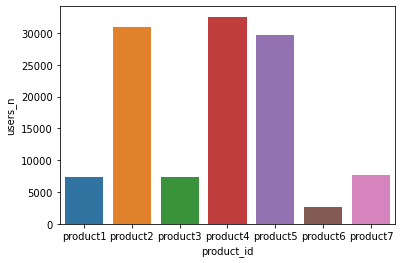

In [12]:
cols = list(party_products.columns)
cols.remove('party_rk')
sums = party_products[cols].sum()
sums = sums.reset_index()
sums.columns=['product_id', 'users_n']
sns.barplot(x=sums.product_id, y=sums.users_n)

In [13]:
party_x_socdem = pd.read_csv('avk_hackathon_data_party_x_socdem.csv')
party_x_socdem.head()

,party_rk,gender_cd,age,marital_status_desc,children_cnt,region_flg
0,61243,F,70.0,NaN,0,0
1,66535,F,25.0,NaN,0,0
2,83721,M,55.0,Женат/замужем,0,0
3,88238,F,35.0,NaN,0,0
4,57179,F,30.0,Женат/замужем,0,0


In [14]:
story_logs = pd.read_csv('avk_hackathon_data_story_logs.csv')
story_logs.head(10)
#story_logs.describe()
#story_logs.event.unique()
#story_logs[story_logs['event'] == '14]']

,party_rk,date_time,story_id,category,event
0,64266,2019-12-01 13:05:31,3840,39,like
1,55721,2019-12-01 13:18:08,3857,39,like
2,27563,2019-12-01 13:25:40,3174,78,like
3,61223,2019-12-01 13:25:20,3857,39,like
4,61223,2019-12-01 13:29:05,3765,73,like
5,87324,2019-12-27 10:27:11,2319,81,like
6,64971,2019-12-27 11:06:13,4075,44,like
7,43081,2019-12-21 10:46:12,4018,81,like
8,53923,2019-12-01 13:12:56,3116,16,like
9,48382,2019-12-10 12:06:47,3840,39,like


In [15]:
story_texts = pd.read_csv('avk_hackathon_data_story_texts.csv')
story_texts.head(10)
#story_texts.describe()

,story_id,name,story_text
0,794,Профессия: свадебный организатор,"["""",""Как стать свадебным организатором"",""Это Л..."
1,821,Бизнес: магазин электроники,"["""",""Как открыть интернет-магазин электроники""..."
2,824,Как у них: Сингапур,"["""",""Жизнь в Сингапуре"",""Это Славина. Вместе с..."
3,839,Студии йоги,"["""",""Студии йоги"",""7 московских студий, где мо..."
4,848,Как получать больше кэшбэка,"["""",""Как получать больше кэшбэка"",""Подключите ..."
5,851,Траты в поездке,"["""",""Как вы съездили\\\\n{{tr_country}}"",""Судя..."
6,872,Как у них: Тайвань,"["""",""Жизнь на Тайване"",""Это Таня. Она прожила ..."
7,876,Повысьте статус карты,"["""",""Поменяйте свою карту на премиальную в оди..."
8,894,Вы в соцсетях,"["""",""В каких соцсетях вы подписаны на Тинькофф..."
9,917,5 мультиков на выходные,"["""",""5 хороших европейских мультфильмов"",""Что ..."


In [16]:
storis = story_logs.merge(story_texts, how='left')
#storis.query("'еда' in story_text").head(100)
'''c = 0
for i in storis.story_text:
    if type(i) == str:
        if 'фастфуд' in i:
            print(c, i)
    c += 1'''

"c = 0\nfor i in storis.story_text:\n    if type(i) == str:\n        if 'фастфуд' in i:\n            print(c, i)\n    c += 1"

In [17]:
''.join(storis[storis.name == 'Траты недели {{w_period_p}}'].iloc[[0]]['story_text'])

'["","{{w_period}}","Расходы за неделю","{{w_sum}} ₽","На прошлой неделе: {{w_sum2}} ₽","На что вы тратили деньги →","{{w_period}}","Регулярные траты","{{w_reg_cat1}}","{{w_reg_cat1_sum}} ₽","{{w_reg_cat1_sum_dif}} ₽","Больше всего: {{w_reg_cat1_sum_max}}\xa0₽)","!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!","{{w_reg_cat2}}","{{w_reg_cat2_sum}} ₽","{{w_reg_cat2_sum_dif}} ₽","Больше всего: {{w_reg_cat2_sum_max}}\xa0₽)","!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!","{{w_reg_cat3}}","{{w_reg_cat3_sum}} ₽","{{w_reg_cat3_sum_dif}} ₽","Больше всего: {{w_reg_cat3_sum_max}}\xa0₽)","!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [18]:
print(storis.name.value_counts())
print(storis.category.value_counts().head(30))

Траты недели {{w_period_p}}         381
Цифра дня                           301
С днем рождения!                    299
6 правил кредитки                   223
Выжать максимум из Tinkoff Black    223
                                   ... 
Как у них: Нью-Джерси                 1
Вишлисты                              1
Платить меньше по кредитам            1
Банкомат списал деньги                1
Казанский стритвир                    1
Name: name, Length: 1105, dtype: int64
81    2392
71    1148
39     826
51     689
44     674
16     612
28     596
2      592
15     590
43     518
78     405
68     392
49     383
73     328
52     295
3      251
46     243
53     220
27     216
50     201
29     177
57     147
10     130
13     119
26     115
34      99
74      96
55      90
20      87
61      85
Name: category, dtype: int64


In [19]:
storis[storis.category == 28].name.value_counts().head(20)

С днем рождения!             282
Ваш кэшбэк: {{cbs_sum}} ₽     70
С днем рождения!              61
Траты в поездке               45
Обналичили кредитку           21
Карта другого банка           14
Такс-фри в Европе              8
Вы в соцсетях                  7
Такс-фри в Испании             5
Такс-фри в Норвегии            2
Такс-фри в Италии              2
Такс-фри в Венгрии             2
Такс-фри в Польше              1
Такс-фри во Франции            1
Такс-фри в Германии            1
Name: name, dtype: int64

In [20]:
print(' '.join(story_texts.iloc[[0]]['story_text']))

["","Как стать свадебным организатором","Это Люба. Ей понравилось организовывать свою свадьбу, и она бросила работу юристом, чтобы стать свадебным организатором.","Свадебный организатор — это такая «точка сборки» для свадьбы. Он делает так, чтобы всё нужное на свадьбу приехало, все хорошо провели время, а потом уехали по домам, а не в больницы.","Одни организаторы работают сами по себе и получают клиентов через знакомых. Другие открывают агентства, в которых работают несколько организаторов.","Чтобы набраться опыта, присмотреть себе помощников и познакомиться с подрядчиками, Люба потратила 48 000 ₽ на обучение в свадебных агентствах. ","У свадебного организатора ненормированный график. В день торжества Люба уходит с площадки последней, когда демонтировали всё оборудование и уехала даже уборщица.","Больше чем за год работы Люба провела 15 свадеб с бюджетами от 200 000 ₽ до 1 млн ₽. Свадьбу на миллион она готовила 6 месяцев и получила за нее 250 000 ₽.","Люба убеждена, что в первую очере

In [21]:
data_transactions = pd.read_csv('avk_hackathon_data_transactions.csv')
data_transactions.head(10)
data_transactions.merchant_type.unique().shape[0]
#data_transactions.category.unique()

458

In [22]:
data_transactions.category.unique()

array(['Сувениры', 'Фаст Фуд', 'Супермаркеты', 'Дом/Ремонт',
       'Сервисные услуги', 'Красота', nan, 'Разные товары', 'Транспорт',
       'Медицинские услуги', 'Топливо', 'Одежда/Обувь', 'Наличные',
       'Связь/Телеком', 'Частные услуги', 'Финансовые услуги',
       'Рестораны', 'Развлечения', 'НКО', 'Книги', 'Кино', 'Автоуслуги',
       'Музыка', 'Отели', 'Аптеки', 'Цветы', 'Ж/д билеты', 'Авиабилеты',
       'Спорттовары', 'Госсборы', 'Аренда авто', 'Животные', 'Duty Free',
       'Турагентства', 'Образование', 'Искусство', 'Фото/Видео'],
      dtype=object)

In [23]:
data_transactions.head(10)

,party_rk,account_rk,financial_account_type_cd,transaction_dttm,transaction_type_desc,transaction_amt_rur,merchant_rk,merchant_type,merchant_group_rk,category
0,20337,19666,1,2019-01-01,Покупка,84.00,88676.0,348.0,NaN,Сувениры
1,63404,72991,1,2019-01-01,Покупка,410.00,887248.0,330.0,725.0,Фаст Фуд
2,24789,23517,2,2019-01-01,Покупка,701.44,830014.0,291.0,NaN,Супермаркеты
3,57970,64838,2,2019-01-01,Покупка,6203.70,363834.0,278.0,454.0,Дом/Ремонт
4,12232,11591,2,2019-01-01,Покупка,734.53,85919.0,286.0,878.0,Супермаркеты
5,51074,54639,2,2019-01-01,Покупка,366.60,146084.0,286.0,878.0,Супермаркеты
6,1534,5610,2,2019-01-01,Покупка,101.85,166649.0,286.0,341.0,Супермаркеты
7,60670,68904,2,2019-01-01,Покупка,612.00,1117458.0,412.0,2187.0,Сервисные услуги
8,40142,6254,1,2019-01-01,Покупка,375.12,798183.0,291.0,999.0,Супермаркеты
9,26389,25082,2,2019-01-01,Покупка,1734.00,123479.0,367.0,2335.0,Красота


In [24]:
data_transactions.head(1000)[data_transactions.head(1000).category == 'Кино']
#data_transactions.transaction_amt_rur.describe()
#data_transactions.transaction_type_desc.value_counts()

,party_rk,account_rk,financial_account_type_cd,transaction_dttm,transaction_type_desc,transaction_amt_rur,merchant_rk,merchant_type,merchant_group_rk,category
147,63726,73610,2,2019-01-01,Покупка,571.0,316774.0,447.0,NaN,Кино
285,10828,10234,2,2019-01-02,Покупка,805.0,87536.0,446.0,2856.0,Кино
631,35967,36196,2,2019-01-05,Покупка,934.0,944618.0,447.0,1351.0,Кино
645,48622,51227,2,2019-01-05,Покупка,1359.0,293324.0,447.0,206.0,Кино
682,62922,28281,1,2019-01-05,Покупка,1896.0,428011.0,447.0,NaN,Кино
898,12257,35392,2,2019-01-08,Покупка,552.0,1039063.0,447.0,1351.0,Кино
914,5660,23264,2,2019-01-08,Покупка,1738.0,115189.0,447.0,476.0,Кино


In [25]:
data_transactions['transaction_dttm'] = pd.to_datetime(data_transactions['transaction_dttm'])
data_transactions['year'] = data_transactions.transaction_dttm.dt.year
data_transactions['month'] = data_transactions.transaction_dttm.dt.month
data_transactions['day'] = data_transactions.transaction_dttm.dt.day
data_transactions['weekday'] = data_transactions.transaction_dttm.dt.weekday
#data_transactions.drop(columns=['transaction_dttm'], inplace=True)
data_transactions[['party_rk', 'year', 'month', 'transaction_amt_rur']].groupby(['party_rk', 'year', 'month']).sum()

transaction_amt_rur
party_rk year month                     
1        2019 1                 10035.00
              2                 32137.35
              3                  7768.68
              4                 12550.49
              5                 13755.85
...                                  ...
94608    2019 11                 4560.00
              12                 4557.00
94610    2019 10                54247.96
              11                   81.00
              12                31085.01

[461735 rows x 1 columns]

In [26]:
new_data = data_transactions.groupby(['party_rk', 'year', 'month'])['transaction_amt_rur'].sum().reset_index()
new_data.head(30)


,party_rk,year,month,transaction_amt_rur
0,1,2019,1,10035.00
1,1,2019,2,32137.35
2,1,2019,3,7768.68
3,1,2019,4,12550.49
4,1,2019,5,13755.85
5,1,2019,6,14100.00
6,1,2019,7,9100.00
7,1,2019,8,9100.00
8,1,2019,9,62172.00
9,1,2019,11,5594.00


In [27]:
full_data = new_data.merge(party_x_socdem, on='party_rk', how='left')
#full_data.head(30)
full_data['user_transactions_by_month'] = full_data['party_rk'].map(full_data.groupby(['party_rk'])['transaction_amt_rur'].sum())
full_data['month_presented'] = full_data['party_rk'].map(full_data.groupby(['party_rk'])['month'].count())
full_data['user_transactions_by_month'] = full_data['user_transactions_by_month'] / full_data['month_presented']
full_data.drop(columns=['month_presented'], inplace=True)
full_data = full_data.merge(party_products, on='party_rk', how='left')
full_data.head(30)
#full_data.party_rk.value_counts()

,party_rk,year,month,transaction_amt_rur,gender_cd,age,marital_status_desc,children_cnt,region_flg,user_transactions_by_month,product1,product2,product3,product4,product5,product6,product7
0,1,2019,1,10035.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0
1,1,2019,2,32137.35,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0
2,1,2019,3,7768.68,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0
3,1,2019,4,12550.49,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0
4,1,2019,5,13755.85,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0
5,1,2019,6,14100.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0
6,1,2019,7,9100.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0
7,1,2019,8,9100.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0
8,1,2019,9,62172.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0
9,1,2019,11,5594.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0


In [28]:
full_data['n_prods'] = sum([full_data['product'+str(i+1)] for i in range(7)])

In [29]:
full_data.head(30)
categs = [0, 20000, 50000, 80000, 100000, 10000000]
def get_cat(x):
    for i in range(5):
        if categs[i] <= x < categs[i+1]:
            return i+1
        
full_data['user_transactions_cat'] = full_data['user_transactions_by_month'].apply(get_cat)
#house_data['price_cat'] = house_data['price'].apply(get_cat)
full_data.head(30)

,party_rk,year,month,transaction_amt_rur,gender_cd,age,marital_status_desc,children_cnt,region_flg,user_transactions_by_month,product1,product2,product3,product4,product5,product6,product7,n_prods,user_transactions_cat
0,1,2019,1,10035.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0
1,1,2019,2,32137.35,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0
2,1,2019,3,7768.68,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0
3,1,2019,4,12550.49,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0
4,1,2019,5,13755.85,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0
5,1,2019,6,14100.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0
6,1,2019,7,9100.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0
7,1,2019,8,9100.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0
8,1,2019,9,62172.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0
9,1,2019,11,5594.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0


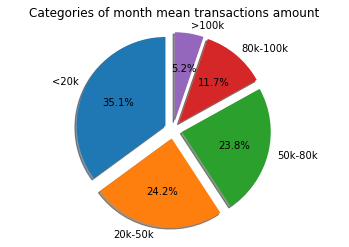

In [30]:
fig1, ax1 = plt.subplots()
labels = ['<20k', '20k-50k', '50k-80k', '80k-100k', '>100k']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
ax1.pie(full_data.user_transactions_cat.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Categories of month mean transactions amount')
fig1.savefig('pie', dpi=400)
plt.show()

In [31]:
full_data.columns

Index(['party_rk', 'year', 'month', 'transaction_amt_rur', 'gender_cd', 'age',
       'marital_status_desc', 'children_cnt', 'region_flg',
       'user_transactions_by_month', 'product1', 'product2', 'product3',
       'product4', 'product5', 'product6', 'product7', 'n_prods',
       'user_transactions_cat'],
      dtype='object')

In [32]:
#full_data['prods'] = list(full_data['product'+str(i+1)] for i in range(7))
full_data['prods'] = [[]]*full_data.shape[0]
for index, rows in full_data.iterrows():
    full_data.at[index, 'prods'] = list(rows['product'+str(i+1)] for i in range(7))
full_data.head(10)

,party_rk,year,month,transaction_amt_rur,gender_cd,age,marital_status_desc,children_cnt,region_flg,user_transactions_by_month,product1,product2,product3,product4,product5,product6,product7,n_prods,user_transactions_cat,prods
0,1,2019,1,10035.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
1,1,2019,2,32137.35,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
2,1,2019,3,7768.68,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
3,1,2019,4,12550.49,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
4,1,2019,5,13755.85,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
5,1,2019,6,14100.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
6,1,2019,7,9100.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
7,1,2019,8,9100.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
8,1,2019,9,62172.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
9,1,2019,11,5594.00,M,55.0,Женат/замужем,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"


In [33]:
full_data['gender_cd'] = full_data['gender_cd'].astype('category')
full_data['gender_cd'] = full_data['gender_cd'].cat.codes
full_data['marital_status_desc'] = full_data['marital_status_desc'].astype('category').cat.codes
full_data.head(10)

,party_rk,year,month,transaction_amt_rur,gender_cd,age,marital_status_desc,children_cnt,region_flg,user_transactions_by_month,product1,product2,product3,product4,product5,product6,product7,n_prods,user_transactions_cat,prods
0,1,2019,1,10035.00,1,55.0,2,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
1,1,2019,2,32137.35,1,55.0,2,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
2,1,2019,3,7768.68,1,55.0,2,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
3,1,2019,4,12550.49,1,55.0,2,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
4,1,2019,5,13755.85,1,55.0,2,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
5,1,2019,6,14100.00,1,55.0,2,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
6,1,2019,7,9100.00,1,55.0,2,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
7,1,2019,8,9100.00,1,55.0,2,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
8,1,2019,9,62172.00,1,55.0,2,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"
9,1,2019,11,5594.00,1,55.0,2,1,0,16502.124545,0,1,0,1,0,0,0,2,1.0,"[0, 1, 0, 1, 0, 0, 0]"


In [53]:
aaa = data_transactions.query("month in [9, 10]")

In [54]:
aaa.merchant_type.value_counts().shape

(382,)

In [55]:
new_aaa = aaa.merchant_type.value_counts().to_frame().reset_index()
new_aaa.columns = ['merchant_type', 'transactions_number']
dfff = aaa.query("merchant_type in @new_aaa.merchant_type")

In [160]:
len(aaa.party_rk.unique())

45276

In [56]:
money_by_mt = dfff.groupby(['party_rk', 'merchant_type'])['transaction_amt_rur'].sum().reset_index()
#money_by_mt['money']
money_by_mt.head(10)

,party_rk,merchant_type,transaction_amt_rur
0,1,1.0,55680.00
1,1,381.0,6492.00
2,5,5.0,5076.00
3,5,37.0,11049.00
4,5,229.0,1728.00
5,5,237.0,40206.00
6,5,286.0,12294.07
7,5,291.0,167.00
8,5,297.0,5504.47
9,5,330.0,3681.00


45254

In [41]:
#money_by_mt = data_transactions.groupby(['party_rk', 'month', 'merchant_type'])['transaction_amt_rur'].sum()
#money_by_mt.head(10)

party_rk  month  merchant_type
1         1      1.0              10035.00
          2      1.0              20200.00
                 286.0             8024.35
                 308.0             2955.00
                 330.0              958.00
          3      243.0              368.00
                 244.0              713.50
                 286.0              502.00
                 297.0             2064.68
                 308.0             2048.00
Name: transaction_amt_rur, dtype: float64

In [42]:
#money_by_mt = money_by_mt.reset_index()
#money_by_mt.head(20)

,party_rk,month,merchant_type,transaction_amt_rur
0,1,1,1.0,10035.00
1,1,2,1.0,20200.00
2,1,2,286.0,8024.35
3,1,2,308.0,2955.00
4,1,2,330.0,958.00
5,1,3,243.0,368.00
6,1,3,244.0,713.50
7,1,3,286.0,502.00
8,1,3,297.0,2064.68
9,1,3,308.0,2048.00


In [57]:
money_by_mt = money_by_mt.merge(money_by_mt.groupby(['party_rk'])['transaction_amt_rur'].sum().reset_index(), on=['party_rk'], how='left')

In [58]:
len(money_by_mt.party_rk.unique())

44838

In [59]:
money_by_mt.columns = ['party_rk', 'merchant_type', 'transaction_amt_rur', '2_month_money']
#money_by_mt.head(20)
len(money_by_mt.party_rk.unique())

44838

In [60]:
dff = money_by_mt.groupby(['party_rk'])['transaction_amt_rur'].sum().reset_index()
dff.head()

,party_rk,transaction_amt_rur
0,1,62172.00
1,5,111604.54
2,7,1275490.09
3,8,5640.00
4,9,3329.72


382

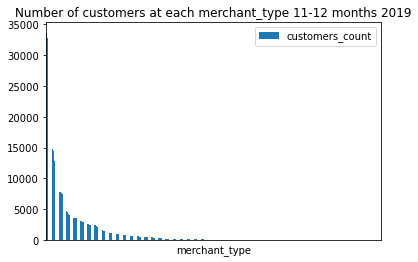

In [61]:
#money_by_mt = money_by_mt.query('month in [11, 12]')
data1 = money_by_mt.merchant_type.value_counts().to_frame().reset_index()
data1.columns = ['merchant_type', 'customers_count']
data1.plot(x='merchant_type', y='customers_count', kind='bar', xticks=[], title='Number of customers at each merchant_type 11-12 months 2019')
data1.shape[0]

In [62]:
#dff.merchant_type.fillna(0, inplace=True)
money_by_mt.merchant_type.fillna(0, inplace=True)
money_by_mt.merchant_type = money_by_mt.merchant_type.astype(int)
#dff.merchant_type = dff.merchant_type.astype(int)
#print(data_transactions.merchant_type.count(), data_transactions.shape[0])

In [63]:
for i in money_by_mt.merchant_type.value_counts().to_frame().reset_index()['index']:
    money_by_mt[str(i)] = 0
    money_by_mt.loc[money_by_mt.merchant_type == i, str(i)] = money_by_mt[money_by_mt.merchant_type == i].transaction_amt_rur / money_by_mt[money_by_mt.merchant_type == i]['2_month_money']
    print('merchant_type', i, 'is counted')
money_by_mt.head(10)   



merchant_type 1 is counted
merchant_type 286 is counted
merchant_type 330 is counted
merchant_type 291 is counted
merchant_type 381 is counted
merchant_type 335 is counted
merchant_type 5 is counted
merchant_type 297 is counted
merchant_type 328 is counted
merchant_type 336 is counted
merchant_type 380 is counted
merchant_type 388 is counted
merchant_type 378 is counted
merchant_type 284 is counted
merchant_type 226 is counted
merchant_type 274 is counted
merchant_type 313 is counted
merchant_type 229 is counted
merchant_type 309 is counted
merchant_type 367 is counted
merchant_type 283 is counted
merchant_type 285 is counted
merchant_type 230 is counted
merchant_type 275 is counted
merchant_type 296 is counted
merchant_type 346 is counted
merchant_type 447 is counted
merchant_type 343 is counted
merchant_type 371 is counted
merchant_type 491 is counted
merchant_type 342 is counted
merchant_type 323 is counted
merchant_type 311 is counted
merchant_type 374 is counted
merchant_type 401 

merchant_type 27 is counted
merchant_type 36 is counted
merchant_type 91 is counted
merchant_type 90 is counted
merchant_type 141 is counted
merchant_type 69 is counted
merchant_type 300 is counted
merchant_type 393 is counted
merchant_type 104 is counted
merchant_type 154 is counted
merchant_type 56 is counted
merchant_type 299 is counted
merchant_type 30 is counted
merchant_type 479 is counted
merchant_type 193 is counted
merchant_type 85 is counted
merchant_type 340 is counted
merchant_type 399 is counted
merchant_type 146 is counted
merchant_type 246 is counted
merchant_type 84 is counted
merchant_type 406 is counted
merchant_type 435 is counted
merchant_type 41 is counted
merchant_type 236 is counted
merchant_type 133 is counted
merchant_type 440 is counted
merchant_type 177 is counted
merchant_type 212 is counted
merchant_type 138 is counted
merchant_type 182 is counted
merchant_type 65 is counted
merchant_type 117 is counted
merchant_type 92 is counted
merchant_type 114 is count

,party_rk,merchant_type,transaction_amt_rur,2_month_money,1,286,330,291,381,335,...,21,416,417,163,167,170,128,40,52,172
0,1,1,55680.00,62172.00,0.89558,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,381,6492.00,62172.00,0.00000,0.000000,0.000000,0.000000,0.10442,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5,5076.00,111604.54,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,37,11049.00,111604.54,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,229,1728.00,111604.54,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,237,40206.00,111604.54,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5,286,12294.07,111604.54,0.00000,0.110157,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5,291,167.00,111604.54,0.00000,0.000000,0.000000,0.001496,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5,297,5504.47,111604.54,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5,330,3681.00,111604.54,0.00000,0.000000,0.032983,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
len(money_by_mt.party_rk.unique())

45254

In [3]:
money_by_mt = pd.read_csv('temp.csv')

In [5]:
money_by_mt.head(10)

,Unnamed: 0,party_rk,merchant_type,transaction_amt_rur,2_month_money,286,1,291,330,335,...,48,159,163,170,172,173,96,180,181,444
0,0,1,1,59484.00,108547.37,0.000000,0.548,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,10,261.00,108547.37,0.000000,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,243,368.00,108547.37,0.000000,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,244,1428.00,108547.37,0.000000,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,286,11364.20,108547.37,0.104693,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,1,292,450.30,108547.37,0.000000,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,1,297,3089.37,108547.37,0.000000,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,1,308,5003.00,108547.37,0.000000,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,1,330,2259.00,108547.37,0.000000,0.000,0.0,0.020811,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,1,336,869.00,108547.37,0.000000,0.000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
fff = money_by_mt.drop(columns=['merchant_type', '2_month_money'])

fff = fff.groupby(['party_rk']).sum().reset_index()

fff.head(10)

,party_rk,transaction_amt_rur,1,286,330,291,381,335,5,297,...,21,416,417,163,167,170,128,40,52,172
0,1,62172.00,0.895580,0.000000,0.000000,0.000000,0.104420,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,111604.54,0.000000,0.110157,0.032983,0.001496,0.128122,0.000000,0.045482,0.049321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,1275490.09,0.501533,0.000387,0.000000,0.001544,0.000000,0.003637,0.000000,0.005897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,5640.00,0.543972,0.082624,0.373404,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,3329.72,0.282907,0.090314,0.275699,0.000000,0.000000,0.000000,0.035739,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,11,12193.00,0.622816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,13,20561.00,0.000000,0.012208,0.000000,0.000000,0.982442,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,14,179333.43,0.390892,0.041890,0.007093,0.034441,0.123875,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,15,240346.17,0.000000,0.002014,0.000000,0.000000,0.499489,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,20,41675.42,0.022724,0.040647,0.000000,0.008326,0.554395,0.000000,0.000000,0.024565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
fff.drop(columns='Unnamed: 0', inplace=True)

In [135]:
len(fff.party_rk.unique())

45254

In [170]:
fff['sum_merchants'] = sum(fff[i] for i in fff.columns[2:])
fff.head(20)
#fff.drop(columns='sum_merchants', inplace=True)

,party_rk,transaction_amt_rur,1,286,330,291,381,335,5,297,328,336,380,388,378,313,274,229,284,226,367,309,283,285,230,322,346,447,275,296,491,343,401,371,9,374,342,311,323,243,372,3,355,244,10,332,474,290,329,344,...,383,287,455,239,319,289,400,305,270,420,448,4,278,483,349,407,327,37,472,460,310,251,282,426,271,454,391,15,8,333,295,231,263,265,369,398,334,264,253,473,0,266,477,337,389,386,384,14,358,sum_merchants
0,1,10804.00,0.527953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.472047,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,5,201707.44,0.000000,0.000000,0.000000,0.000000,0.773691,0.000000,0.000000,0.000000,0.000000,0.050516,0.000000,0.000000,0.000000,0.0,0.000000,0.035908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.033206,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,7,1618397.56,0.507848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003616,0.000460,0.000000,0.488075,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
3,9,717.19,0.041830,0.255427,0.000000,0.000000,0.000000,0.000000,0.298387,0.000000,0.000000,0.000000,0.000000,0.285838,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.118518,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
4,11,19266.06,0.383368,0.166374,0.017855,0.000000,0.000000,0.019829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.11663,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
5,13,45833.85,0.000000,0.044799,0.033900,0.000000,0.563295,0.017690,0.026465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.023672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.022276,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [65]:
helpp = full_data.drop(columns=['year', 'month', 'transaction_amt_rur', 'prods'] + ['product'+str(i+1) for i in range(7)]).drop_duplicates()
#helpp.head(10)
final = fff.merge(helpp, on='party_rk', how='left')
final.head(10)

,party_rk,transaction_amt_rur,1,286,330,291,381,335,5,297,...,52,172,gender_cd,age,marital_status_desc,children_cnt,region_flg,user_transactions_by_month,n_prods,user_transactions_cat
0,1,62172.00,0.895580,0.000000,0.000000,0.000000,0.104420,0.000000,0.000000,0.000000,...,0.0,0.0,1,55.0,2,1,0,16502.124545,2,1.0
1,5,111604.54,0.000000,0.110157,0.032983,0.001496,0.128122,0.000000,0.045482,0.049321,...,0.0,0.0,1,45.0,2,1,0,110706.375833,2,5.0
2,7,1275490.09,0.501533,0.000387,0.000000,0.001544,0.000000,0.003637,0.000000,0.005897,...,0.0,0.0,1,45.0,2,4,0,376685.954444,1,5.0
3,8,5640.00,0.543972,0.082624,0.373404,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0,60.0,2,1,0,19532.428571,2,1.0
4,9,3329.72,0.282907,0.090314,0.275699,0.000000,0.000000,0.000000,0.035739,0.000000,...,0.0,0.0,0,40.0,2,1,0,4319.370000,2,1.0
5,11,12193.00,0.622816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0,65.0,2,1,0,7514.903333,1,1.0
6,13,20561.00,0.000000,0.012208,0.000000,0.000000,0.982442,0.000000,0.000000,0.000000,...,0.0,0.0,1,50.0,2,1,0,33712.245000,3,2.0
7,14,179333.43,0.390892,0.041890,0.007093,0.034441,0.123875,0.000000,0.000000,0.000000,...,0.0,0.0,0,50.0,1,2,0,98136.275553,4,4.0
8,15,240346.17,0.000000,0.002014,0.000000,0.000000,0.499489,0.000000,0.000000,0.000000,...,0.0,0.0,1,60.0,2,1,0,212975.046000,4,5.0
9,20,41675.42,0.022724,0.040647,0.000000,0.008326,0.554395,0.000000,0.000000,0.024565,...,0.0,0.0,1,55.0,2,2,0,36991.352727,3,2.0


In [146]:
for i in fff.sum_merchants - 1.0 < 0.00001:
    if not i:
        print(i)

In [148]:
fff.shape

(45254, 66)

In [66]:
final.to_csv('merchant_types_for_test.csv')

In [52]:
final.query("user_transactions_cat not in [1, 2, 3, 4, 5]")
#print(final.shape[0])
#final.loc[4585, 'user_transactions_cat'] = 5

,party_rk,transaction_amt_rur,286,1,291,330,335,5,328,297,...,181,444,gender_cd,age,marital_status_desc,children_cnt,region_flg,user_transactions_by_month,n_prods,user_transactions_cat


In [49]:
o = 2.659875e+07
print(o)

26598750.0


In [52]:
pd.options.display.max_columns = 100
money_by_mt.head()#[money_by_mt.merchant_type == 475].shape[0]

,party_rk,month,merchant_type,transaction_amt_rur,month_money,ratio_of_merchant_type,merchant_type_1,merchant_type_286,merchant_type_330,merchant_type_291,merchant_type_381,merchant_type_5,merchant_type_335,merchant_type_297,merchant_type_328,merchant_type_336,merchant_type_380,merchant_type_388,merchant_type_284,merchant_type_229,merchant_type_378,merchant_type_226,merchant_type_313,merchant_type_274,merchant_type_367,merchant_type_309,merchant_type_283,merchant_type_285,merchant_type_275,merchant_type_230,merchant_type_296,merchant_type_346,merchant_type_9,merchant_type_447,merchant_type_3,merchant_type_491,merchant_type_342,merchant_type_374,merchant_type_323,merchant_type_371,merchant_type_401,merchant_type_243,merchant_type_311,merchant_type_343,merchant_type_322,merchant_type_244,merchant_type_326,merchant_type_332,merchant_type_474,merchant_type_372,...,merchant_type_248,merchant_type_242,merchant_type_227,merchant_type_290,merchant_type_10,merchant_type_308,merchant_type_237,merchant_type_355,merchant_type_392,merchant_type_411,merchant_type_344,merchant_type_317,merchant_type_306,merchant_type_348,merchant_type_412,merchant_type_461,merchant_type_288,merchant_type_450,merchant_type_316,merchant_type_359,merchant_type_496,merchant_type_495,merchant_type_345,merchant_type_432,merchant_type_292,merchant_type_240,merchant_type_278,merchant_type_437,merchant_type_7,merchant_type_385,merchant_type_429,merchant_type_497,merchant_type_241,merchant_type_298,merchant_type_436,merchant_type_321,merchant_type_463,merchant_type_465,merchant_type_459,merchant_type_11,merchant_type_383,merchant_type_481,merchant_type_6,merchant_type_493,merchant_type_458,merchant_type_232,merchant_type_427,merchant_type_464,merchant_type_247,merchant_type_331
25,1,11,1,5594.0,5594.00,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,1,12,1,110.0,5210.00,0.021113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,1,12,388,5100.0,5210.00,0.978887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95,5,11,39,173871.0,320137.44,0.543114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,5,11,229,1902.0,320137.44,0.005941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [236]:
money

array([2019], dtype=int64)

In [235]:
pd.options.display.max_rows = 200
money_by_mt.merchant_type.value_counts().head(100)

1      304447
286    298364
330    183865
291    182793
381    179389
5      139838
335    138488
297    120688
328    106484
336     96852
380     96110
388     83190
284     60549
229     59580
378     59099
226     58431
313     51692
274     49882
367     47388
309     45083
283     40271
285     36041
275     30494
230     30169
296     29574
346     27556
9       26165
447     25967
3       24065
491     23636
342     23293
374     22941
323     22803
371     21736
401     21711
243     21630
311     20752
343     20599
322     20474
244     20330
326     20211
332     18972
474     18857
372     18005
329     17331
2       17223
248     17036
242     16492
227     16237
290     15981
10      15096
308     14931
237     14795
355     14759
392     14623
411     14532
344     14019
317     13697
306     11979
348     11123
412     10912
461     10612
288     10395
450     10283
316      9728
359      9280
496      9075
495      8944
345      8512
432      8219
292      7605
240   

In [224]:
set(data_transactions.merchant_type.unique()) == set(money_by_mt.merchant_type.unique()) #[184:]

False

In [168]:
full_data.to_csv("processed_hack_data.csv")